In [13]:
import pandas as pd
from census import Census
from tabulate import tabulate
import requests

# API key
api_key = "5ac8a932d7cbd9f6812d0e23d23f15c4b900ca27"

# Create Census object
c = Census(api_key, year=2013)

# Dictionary mapping state codes to state names
state_mapping = {
    '01': 'Alabama', '02': 'Alaska', '04': 'Arizona', '05': 'Arkansas',
    '06': 'California', '08': 'Colorado', '09': 'Connecticut', '10': 'Delaware',
    '11': 'District of Columbia', '12': 'Florida', '13': 'Georgia', '15': 'Hawaii',
    '16': 'Idaho', '17': 'Illinois', '18': 'Indiana', '19': 'Iowa', '20': 'Kansas',
    '21': 'Kentucky', '22': 'Louisiana', '23': 'Maine', '24': 'Maryland',
    '25': 'Massachusetts', '26': 'Michigan', '27': 'Minnesota', '28': 'Mississippi',
    '29': 'Missouri', '30': 'Montana', '31': 'Nebraska', '32': 'Nevada',
    '33': 'New Hampshire', '34': 'New Jersey', '35': 'New Mexico', '36': 'New York',
    '37': 'North Carolina', '38': 'North Dakota', '39': 'Ohio', '40': 'Oklahoma',
    '41': 'Oregon', '42': 'Pennsylvania', '44': 'Rhode Island', '45': 'South Carolina',
    '46': 'South Dakota', '47': 'Tennessee', '48': 'Texas', '49': 'Utah', '50': 'Vermont',
    '51': 'Washington', '54': 'West Virginia', '55': 'Wisconsin', '56': 'Wyoming',
    '72': 'Puerto Rico'
}

# Define Census API URL
census_api_url = "https://api.census.gov/data/2013/acs/acs5"

# Define variables for infant mortality data
infant_variables = {
    "get": "NAME,B01001_001E,B01001_011E",
    "for": "state:*"
}

# Fetch infant mortality data from Census API
infant_data = requests.get(census_api_url, params=infant_variables).json()

# Convert the API response to a pandas DataFrame
if infant_data:
    infant_mortality_df = pd.DataFrame(infant_data[1:], columns=infant_data[0])
    infant_mortality_df['State'] = infant_mortality_df['state'].map(state_mapping)
    infant_mortality_df["Mortality Rate"] = infant_mortality_df["B01001_011E"].astype(float) / infant_mortality_df["B01001_001E"].astype(float)
    selected_columns = ["State", "Mortality Rate"]
    print("\nInfant Mortality DataFrame:")
    display(infant_mortality_df)

    # Calculate highest and lowest infant mortality rates
    highest_infant_mortality = infant_mortality_df.nlargest(5, "Mortality Rate")
    lowest_infant_mortality = infant_mortality_df.nsmallest(5, "Mortality Rate")
    print("\nTop 5 states with highest infant mortality rates:")
    display(highest_infant_mortality) 
    print("\nTop 5 states with lowest infant mortality rates:")
    display(lowest_infant_mortality)


Infant Mortality DataFrame:


,NAME,B01001_001E,B01001_011E,state,State,Mortality Rate
0,Alabama,4799277,154319,01,Alabama,0.032155
1,Alaska,720316,30202,02,Alaska,0.041929
2,Arizona,6479703,226271,04,Arizona,0.034920
3,Arkansas,2933369,96166,05,Arkansas,0.032783
4,California,37659181,1433388,06,California,0.038062
5,Colorado,5119329,195669,08,Colorado,0.038222
6,Delaware,908446,29468,10,Delaware,0.032438
7,District of Columbia,619371,33313,11,District of Columbia,0.053785
8,Connecticut,3583561,110066,09,Connecticut,0.030714
9,Florida,19091156,611253,12,Florida,0.032018



Top 5 states with highest infant mortality rates:


,NAME,B01001_001E,B01001_011E,state,State,Mortality Rate
7,District of Columbia,619371,33313,11,District of Columbia,0.053785
1,Alaska,720316,30202,02,Alaska,0.041929
45,Utah,2813673,113048,49,Utah,0.040178
12,Hawaii,1376298,54048,15,Hawaii,0.039271
34,North Dakota,689781,27026,38,North Dakota,0.039181



Top 5 states with lowest infant mortality rates:


,NAME,B01001_001E,B01001_011E,state,State,Mortality Rate
19,Maine,1328320,36587,23,Maine,0.027544
44,Vermont,625904,17787,50,Vermont,0.028418
29,New Hampshire,1319171,38111,33,New Hampshire,0.028890
48,West Virginia,1853619,54098,54,West Virginia,0.029185
22,Michigan,9886095,296367,26,Michigan,0.029978


In [11]:
# Define variables for maternal mortality data
maternal_variables = {
    "get": "NAME,B01001_001E,B01001_012E",
    "for": "state:*"
}

# Fetch maternal mortality data from Census API
maternal_data = requests.get(census_api_url, params=maternal_variables).json()

# Convert the API response to a pandas DataFrame
if maternal_data:
    maternal_mortality_df = pd.DataFrame(maternal_data[1:], columns=maternal_data[0])
    maternal_mortality_df['State'] = maternal_mortality_df['state'].map(state_mapping)
    maternal_mortality_df["Mortality Rate"] = maternal_mortality_df["B01001_012E"].astype(float) / maternal_mortality_df["B01001_001E"].astype(float)
    print("\nMaternal Mortality DataFrame:")
    display(maternal_mortality_df)
    
    # Calculate highest and lowest maternal mortality rates
    highest_maternal_mortality = maternal_mortality_df.nlargest(5, "Mortality Rate")
    lowest_maternal_mortality = maternal_mortality_df.nsmallest(5, "Mortality Rate")
    print("\nTop 5 states with highest maternal mortality rates:")
    display(highest_maternal_mortality)
    print("\nTop 5 states with lowest maternal mortality rates:")
    display(lowest_maternal_mortality)


Maternal Mortality DataFrame:


,NAME,B01001_001E,B01001_012E,state,State,Mortality Rate
0,Alabama,4799277,148033,01,Alabama,0.030845
1,Alaska,720316,26033,02,Alaska,0.036141
2,Arizona,6479703,216784,04,Arizona,0.033456
3,Arkansas,2933369,94066,05,Arkansas,0.032068
4,California,37659181,1342610,06,California,0.035652
5,Colorado,5119329,189853,08,Colorado,0.037086
6,Delaware,908446,27372,10,Delaware,0.030131
7,District of Columbia,619371,29258,11,District of Columbia,0.047238
8,Connecticut,3583561,104599,09,Connecticut,0.029189
9,Florida,19091156,572155,12,Florida,0.029970



Top 5 states with highest maternal mortality rates:


,NAME,B01001_001E,B01001_012E,state,State,Mortality Rate
7,District of Columbia,619371,29258,11,District of Columbia,0.047238
45,Utah,2813673,113093,49,Utah,0.040194
5,Colorado,5119329,189853,08,Colorado,0.037086
28,Nevada,2730066,99189,32,Nevada,0.036332
1,Alaska,720316,26033,02,Alaska,0.036141



Top 5 states with lowest maternal mortality rates:


,NAME,B01001_001E,B01001_012E,state,State,Mortality Rate
19,Maine,1328320,35846,23,Maine,0.026986
44,Vermont,625904,17071,50,Vermont,0.027274
29,New Hampshire,1319171,36057,33,New Hampshire,0.027333
8,Connecticut,3583561,104599,09,Connecticut,0.029189
22,Michigan,9886095,288784,26,Michigan,0.029211


In [15]:
# Define variables for infant mortality data
infant_variables = {
    "get": "NAME,B01001_001E,B01001_011E",
    "for": "state:*"
}

# Fetch infant mortality data from Census API
infant_data = requests.get(census_api_url, params=infant_variables).json()

# Convert the API response to a pandas DataFrame
if infant_data:
    infant_mortality_df = pd.DataFrame(infant_data[1:], columns=infant_data[0])
    infant_mortality_df['State'] = infant_mortality_df['state'].map(state_mapping)
    infant_mortality_df["Infant Mortality Rate"] = infant_mortality_df["B01001_011E"].astype(float) / infant_mortality_df["B01001_001E"].astype(float)

# Define variables for maternal mortality data
maternal_variables = {
    "get": "NAME,B01001_001E,B01001_012E",
    "for": "state:*"
}

# Fetch maternal mortality data from Census API
maternal_data = requests.get(census_api_url, params=maternal_variables).json()

# Convert the API response to a pandas DataFrame
if maternal_data:
    maternal_mortality_df = pd.DataFrame(maternal_data[1:], columns=maternal_data[0])
    maternal_mortality_df['State'] = maternal_mortality_df['state'].map(state_mapping)
    maternal_mortality_df["Maternal Mortality Rate"] = maternal_mortality_df["B01001_012E"].astype(float) / maternal_mortality_df["B01001_001E"].astype(float)

# Merge infant and maternal mortality DataFrames
merged_df = pd.merge(infant_mortality_df[['State', 'Infant Mortality Rate']], maternal_mortality_df[['State', 'Maternal Mortality Rate']], on='State')

# Display the merged DataFrame as a table
print("\nInfant and Maternal Mortality Rates:")
display(merged_df)


Infant and Maternal Mortality Rates:


,State,Infant Mortality Rate,Maternal Mortality Rate
0,Alabama,0.032155,0.030845
1,Alaska,0.041929,0.036141
2,Arizona,0.034920,0.033456
3,Arkansas,0.032783,0.032068
4,California,0.038062,0.035652
5,Colorado,0.038222,0.037086
6,Delaware,0.032438,0.030131
7,District of Columbia,0.053785,0.047238
8,Connecticut,0.030714,0.029189
9,Florida,0.032018,0.029970


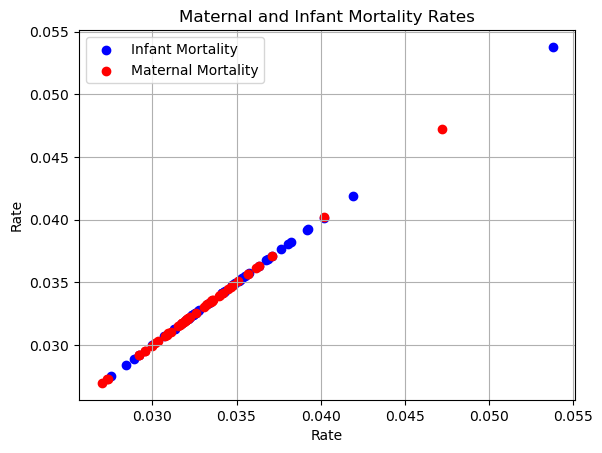

In [4]:
# Fetch infant mortality data from Census API
infant_data = fetch_data_from_census_api(census_api_url, infant_variables)

# Convert the API response to a pandas DataFrame
if infant_data:
    infant_mortality_df = pd.DataFrame(infant_data[1:], columns=infant_data[0])

    # Calculate infant mortality rate
    infant_mortality_df["Mortality Rate"] = infant_mortality_df["B01001_011E"].astype(float) / infant_mortality_df["B01001_001E"].astype(float)

    # Plot infant mortality data
    plt.scatter(infant_mortality_df["Mortality Rate"], infant_mortality_df["Mortality Rate"], label="Infant Mortality", color="blue")

# Define variables for maternal mortality data
maternal_variables = {
    "get": "NAME,B01001_001E,B01001_012E",
    "for": "state:*"
}

# Fetch maternal mortality data from Census API
maternal_data = fetch_data_from_census_api(census_api_url, maternal_variables)

# Convert the API response to a pandas DataFrame
if maternal_data:
    maternal_mortality_df = pd.DataFrame(maternal_data[1:], columns=maternal_data[0])

    # Calculate maternal mortality rate
    maternal_mortality_df["Mortality Rate"] = maternal_mortality_df["B01001_012E"].astype(float) / maternal_mortality_df["B01001_001E"].astype(float)

    # Plot maternal mortality data
    plt.scatter(maternal_mortality_df["Mortality Rate"], maternal_mortality_df["Mortality Rate"], label="Maternal Mortality", color="red")

# Plot formatting
plt.xlabel("Rate")
plt.ylabel("Rate")
plt.title("Maternal and Infant Mortality Rates")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

###### 

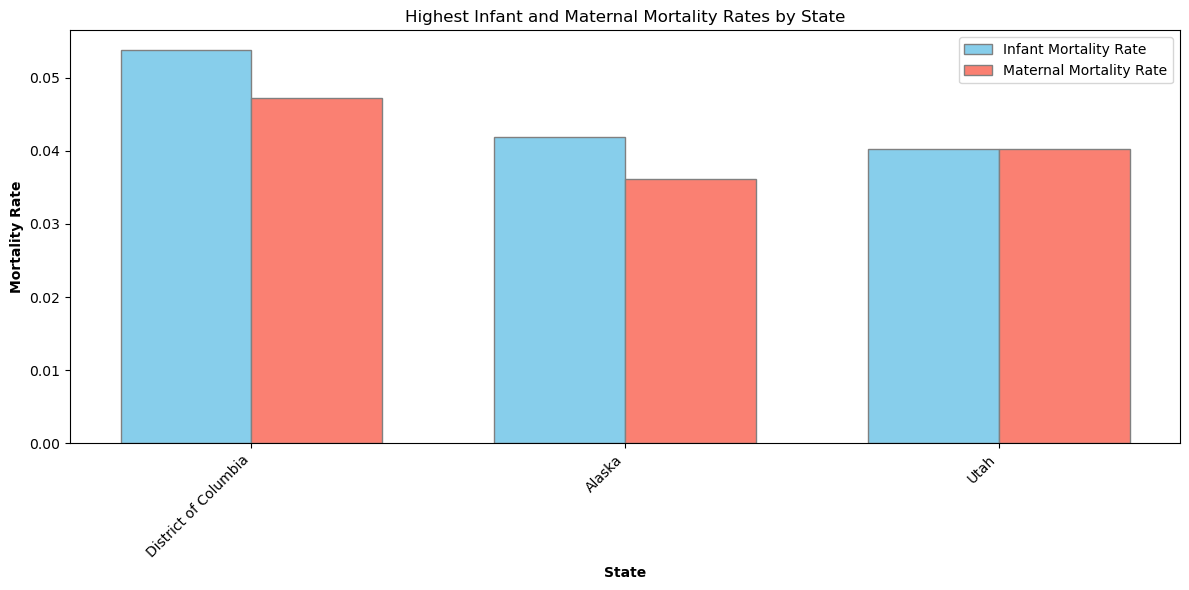

In [13]:
# Combine the highest infant and maternal mortality data into a single DataFrame
combined_df = pd.merge(highest_infant_mortality, highest_maternal_mortality, on='NAME', suffixes=('_infant', '_maternal'))

# Plot bar graph for highest infant and maternal mortality rates
plt.figure(figsize=(12, 6))

# Set the width of the bars
bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(len(combined_df))
r2 = [x + bar_width for x in r1]

# Plot bars
plt.bar(r1, combined_df['Mortality Rate_infant'], color='skyblue', width=bar_width, edgecolor='grey', label='Infant Mortality Rate')
plt.bar(r2, combined_df['Mortality Rate_maternal'], color='salmon', width=bar_width, edgecolor='grey', label='Maternal Mortality Rate')

# Add xticks on the middle of the group bars
plt.xlabel('State', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(combined_df))], combined_df['NAME'], rotation=45, ha='right')

# Add ylabel
plt.ylabel('Mortality Rate', fontweight='bold')

# Add title
plt.title('Highest Infant and Maternal Mortality Rates by State')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


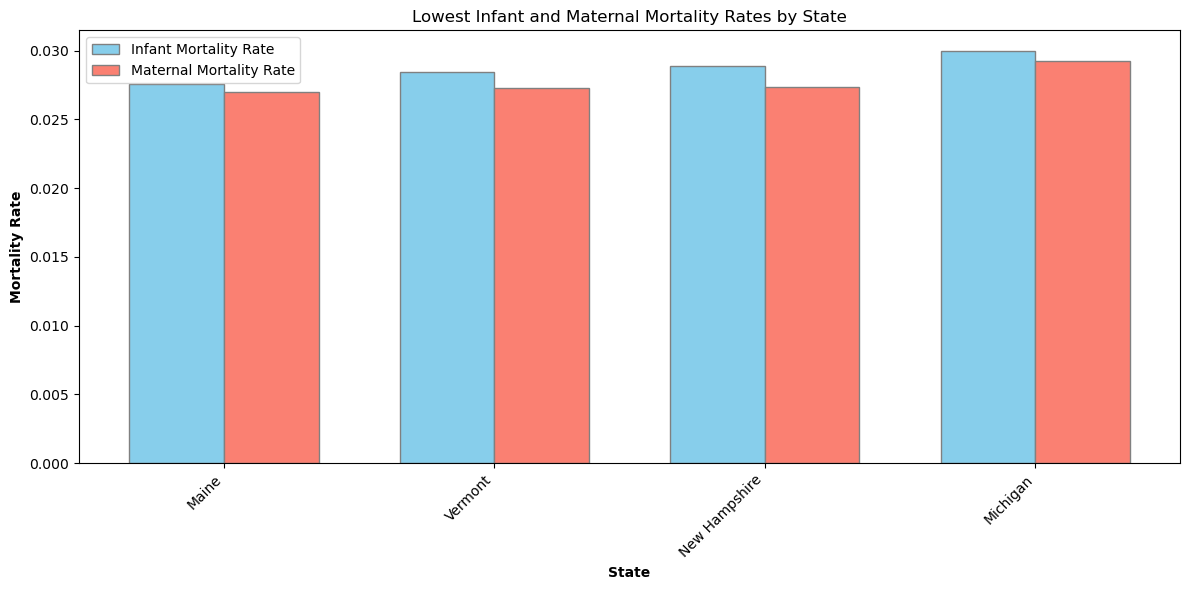

In [14]:
# Combine the lowest infant and maternal mortality data into a single DataFrame
combined_df_lowest = pd.merge(lowest_infant_mortality, lowest_maternal_mortality, on='NAME', suffixes=('_infant', '_maternal'))

# Plot bar graph for lowest infant and maternal mortality rates
plt.figure(figsize=(12, 6))

# Set the width of the bars
bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(len(combined_df_lowest))
r2 = [x + bar_width for x in r1]

# Plot bars
plt.bar(r1, combined_df_lowest['Mortality Rate_infant'], color='skyblue', width=bar_width, edgecolor='grey', label='Infant Mortality Rate')
plt.bar(r2, combined_df_lowest['Mortality Rate_maternal'], color='salmon', width=bar_width, edgecolor='grey', label='Maternal Mortality Rate')

# Add xticks on the middle of the group bars
plt.xlabel('State', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(combined_df_lowest))], combined_df_lowest['NAME'], rotation=45, ha='right')

# Add ylabel
plt.ylabel('Mortality Rate', fontweight='bold')

# Add title
plt.title('Lowest Infant and Maternal Mortality Rates by State')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


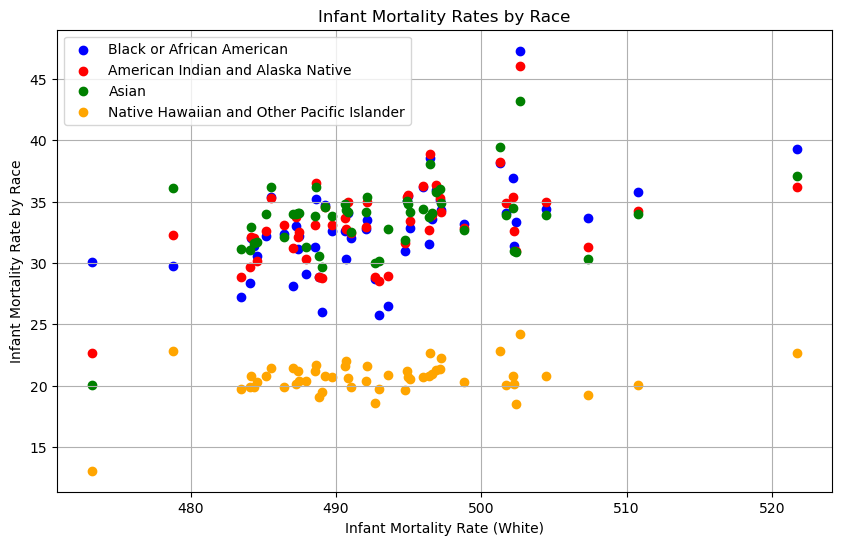

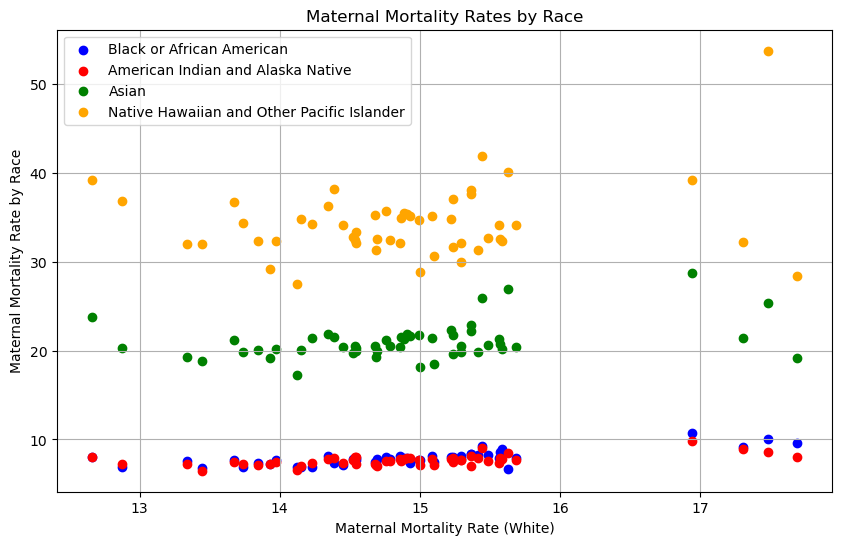

In [30]:
# Define Census API URL
census_api_url = "https://api.census.gov/data/2013/acs/acs5"

# Define variables for infant mortality data by race
infant_variables = {
    "get": "NAME,B01001_001E,B01001_002E,B01001_003E,B01001_004E,B01001_005E,B01001_006E",
    "for": "state:*"
}

# Fetch infant mortality data by race from Census API
infant_data_by_race = requests.get(census_api_url, params=infant_variables).json()

# Convert the API response to a pandas DataFrame
if infant_data_by_race:
    infant_mortality_race_df = pd.DataFrame(infant_data_by_race[1:], columns=infant_data_by_race[0])
    infant_mortality_race_df['State'] = infant_mortality_race_df['state'].map(state_mapping)
    infant_mortality_race_df['Total Population'] = infant_mortality_race_df['B01001_001E'].astype(int)
    infant_mortality_race_df['White'] = infant_mortality_race_df['B01001_002E'].astype(int)
    infant_mortality_race_df['Black or African American'] = infant_mortality_race_df['B01001_003E'].astype(int)
    infant_mortality_race_df['American Indian and Alaska Native'] = infant_mortality_race_df['B01001_004E'].astype(int)
    infant_mortality_race_df['Asian'] = infant_mortality_race_df['B01001_005E'].astype(int)
    infant_mortality_race_df['Native Hawaiian and Other Pacific Islander'] = infant_mortality_race_df['B01001_006E'].astype(int)

# Calculate infant mortality rates by race
infant_mortality_race_df['Infant Mortality Rate (White)'] = (infant_mortality_race_df['White'] / infant_mortality_race_df['Total Population']) * 1000
infant_mortality_race_df['Infant Mortality Rate (Black or African American)'] = (infant_mortality_race_df['Black or African American'] / infant_mortality_race_df['Total Population']) * 1000
infant_mortality_race_df['Infant Mortality Rate (American Indian and Alaska Native)'] = (infant_mortality_race_df['American Indian and Alaska Native'] / infant_mortality_race_df['Total Population']) * 1000
infant_mortality_race_df['Infant Mortality Rate (Asian)'] = (infant_mortality_race_df['Asian'] / infant_mortality_race_df['Total Population']) * 1000
infant_mortality_race_df['Infant Mortality Rate (Native Hawaiian and Other Pacific Islander)'] = (infant_mortality_race_df['Native Hawaiian and Other Pacific Islander'] / infant_mortality_race_df['Total Population']) * 1000

# Define variables for maternal mortality data by race
maternal_variables = {
    "get": "NAME,B01001_001E,B01001_007E,B01001_008E,B01001_009E,B01001_010E,B01001_011E",
    "for": "state:*"
}

# Fetch maternal mortality data by race from Census API
maternal_data_by_race = requests.get(census_api_url, params=maternal_variables).json()

# Convert the API response to a pandas DataFrame
if maternal_data_by_race:
    maternal_mortality_race_df = pd.DataFrame(maternal_data_by_race[1:], columns=maternal_data_by_race[0])
    maternal_mortality_race_df['State'] = maternal_mortality_race_df['state'].map(state_mapping)
    maternal_mortality_race_df['Total Population'] = maternal_mortality_race_df['B01001_001E'].astype(int)
    maternal_mortality_race_df['White'] = maternal_mortality_race_df['B01001_007E'].astype(int)
    maternal_mortality_race_df['Black or African American'] = maternal_mortality_race_df['B01001_008E'].astype(int)
    maternal_mortality_race_df['American Indian and Alaska Native'] = maternal_mortality_race_df['B01001_009E'].astype(int)
    maternal_mortality_race_df['Asian'] = maternal_mortality_race_df['B01001_010E'].astype(int)
    maternal_mortality_race_df['Native Hawaiian and Other Pacific Islander'] = maternal_mortality_race_df['B01001_011E'].astype(int)

# Calculate maternal mortality rates by race
maternal_mortality_race_df['Maternal Mortality Rate (White)'] = (maternal_mortality_race_df['White'] / maternal_mortality_race_df['Total Population']) * 1000
maternal_mortality_race_df['Maternal Mortality Rate (Black or African American)'] = (maternal_mortality_race_df['Black or African American'] / maternal_mortality_race_df['Total Population']) * 1000
maternal_mortality_race_df['Maternal Mortality Rate (American Indian and Alaska Native)'] = (maternal_mortality_race_df['American Indian and Alaska Native'] / maternal_mortality_race_df['Total Population']) * 1000
maternal_mortality_race_df['Maternal Mortality Rate (Asian)'] = (maternal_mortality_race_df['Asian'] / maternal_mortality_race_df['Total Population']) * 1000
maternal_mortality_race_df['Maternal Mortality Rate (Native Hawaiian and Other Pacific Islander)'] = (maternal_mortality_race_df['Native Hawaiian and Other Pacific Islander'] / maternal_mortality_race_df['Total Population']) * 1000

# Create a scatter plot for infant mortality rates by race
plt.figure(figsize=(10, 6))
plt.scatter(infant_mortality_race_df['Infant Mortality Rate (White)'], infant_mortality_race_df['Infant Mortality Rate (Black or African American)'], color='blue', label='Black or African American')
plt.scatter(infant_mortality_race_df['Infant Mortality Rate (White)'], infant_mortality_race_df['Infant Mortality Rate (American Indian and Alaska Native)'], color='red', label='American Indian and Alaska Native')
plt.scatter(infant_mortality_race_df['Infant Mortality Rate (White)'], infant_mortality_race_df['Infant Mortality Rate (Asian)'], color='green', label='Asian')
plt.scatter(infant_mortality_race_df['Infant Mortality Rate (White)'], infant_mortality_race_df['Infant Mortality Rate (Native Hawaiian and Other Pacific Islander)'], color='orange', label='Native Hawaiian and Other Pacific Islander')
plt.xlabel('Infant Mortality Rate (White)')
plt.ylabel('Infant Mortality Rate by Race')
plt.title('Infant Mortality Rates by Race')
plt.legend()
plt.grid(True)
plt.show()

# Create a scatter plot for maternal mortality rates by race
plt.figure(figsize=(10, 6))
plt.scatter(maternal_mortality_race_df['Maternal Mortality Rate (White)'], maternal_mortality_race_df['Maternal Mortality Rate (Black or African American)'], color='blue', label='Black or African American')
plt.scatter(maternal_mortality_race_df['Maternal Mortality Rate (White)'], maternal_mortality_race_df['Maternal Mortality Rate (American Indian and Alaska Native)'], color='red', label='American Indian and Alaska Native')
plt.scatter(maternal_mortality_race_df['Maternal Mortality Rate (White)'], maternal_mortality_race_df['Maternal Mortality Rate (Asian)'], color='green', label='Asian')
plt.scatter(maternal_mortality_race_df['Maternal Mortality Rate (White)'], maternal_mortality_race_df['Maternal Mortality Rate (Native Hawaiian and Other Pacific Islander)'], color='orange', label='Native Hawaiian and Other Pacific Islander')
plt.xlabel('Maternal Mortality Rate (White)')
plt.ylabel('Maternal Mortality Rate by Race')
plt.title('Maternal Mortality Rates by Race')
plt.legend()
plt.grid(True)
plt.show()
